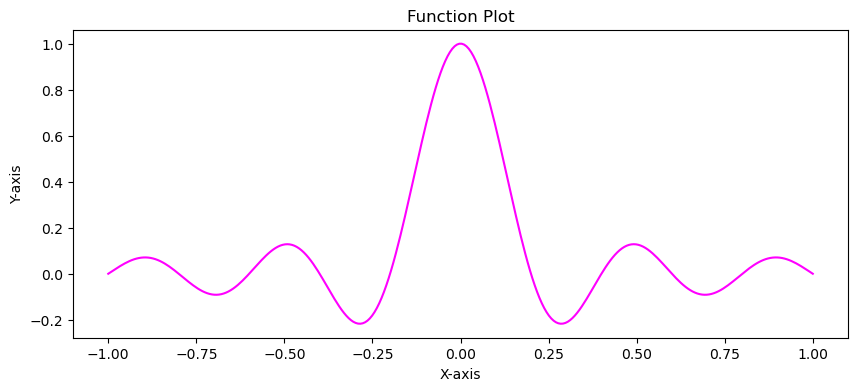


--- Model 1 ---
Total parameters: 2177

Model 1 Weights Before Training
layer1.weight: Parameter containing:
tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414],
        [ 0.5997],
        [-0.2057],
        [ 0.5087],
        [ 0.1390],
        [-0.1224],
        [ 0.2774],
        [ 0.0493],
        [ 0.3652],
        [-0.3897],
        [-0.0729],
        [-0.0900]], requires_grad=True)
layer1.bias: Parameter containing:
tensor([ 0.1449, -0.0040,  0.8742,  0.3112, -0.3724, -0.6040, -0.1676, -0.4313,
        -0.3204,  0.0479,  0.5961,  0.5435, -0.9776,  0.6199,  0.2794,  0.9486],
       requires_grad=True)
layer2.weight: Parameter containing:
tensor([[ 0.1650, -0.2278, -0.2377, -0.1206,  0.2195, -0.0416,  0.1070, -0.1162,
          0.2453, -0.1058,  0.1875,  0.0030, -0.1317,  0.1285, -0.1327,  0.0735],
        [-0.0722, -0.0274, -0.2403, -0.1192,  0.1357, -0.0608,  0.2490,  0.2004,
         -0.0117, -0.1669,  0.1522,  0.0776, -0.1616,  0.1624

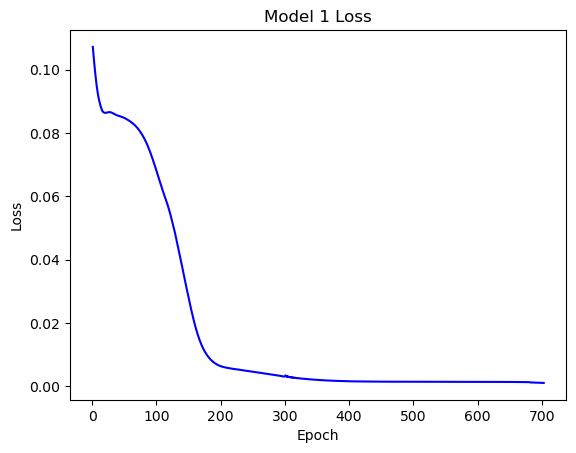

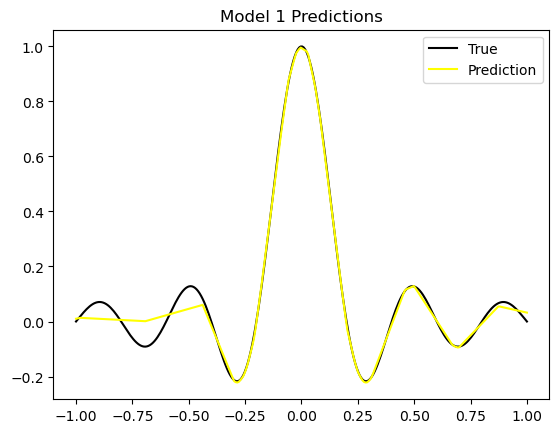


--- Model 2 ---
Total parameters: 2113

Model 2 Weights Before Training
layer1.weight: Parameter containing:
tensor([[ 0.5077],
        [-0.4253],
        [ 0.7866],
        [-0.6820],
        [-0.5204],
        [ 0.3463],
        [ 0.6146],
        [-0.0122],
        [-0.7850],
        [-0.0399],
        [-0.3376],
        [-0.3195],
        [-0.1848],
        [ 0.2406],
        [-0.2328],
        [-0.7013],
        [-0.4993],
        [-0.8376]], requires_grad=True)
layer1.bias: Parameter containing:
tensor([-0.9988,  0.4833,  0.5587,  0.7557,  0.0792, -0.4113, -0.6014,  0.4981,
        -0.6043,  0.7473, -0.5424, -0.9329, -0.7202,  0.8145,  0.7548,  0.2441,
         0.0231,  0.8574], requires_grad=True)
layer2.weight: Parameter containing:
tensor([[ 0.1422,  0.1396, -0.1604,  0.0377,  0.2135, -0.1660,  0.2348, -0.1544,
         -0.0693, -0.0111,  0.0613,  0.0724, -0.1348,  0.1079,  0.0624, -0.0262,
         -0.2346,  0.2333],
        [-0.0872, -0.1256,  0.2334, -0.1194,  0.1575,  0.1

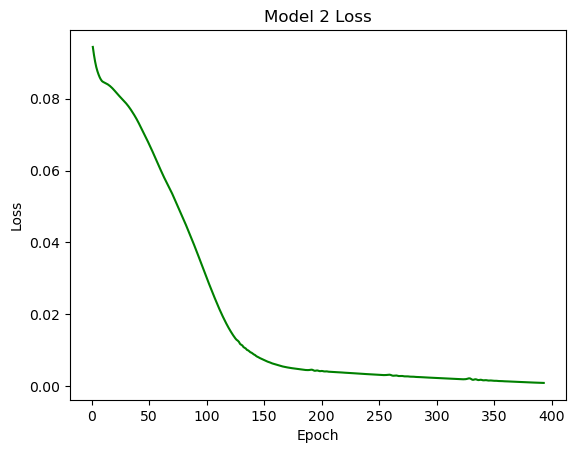

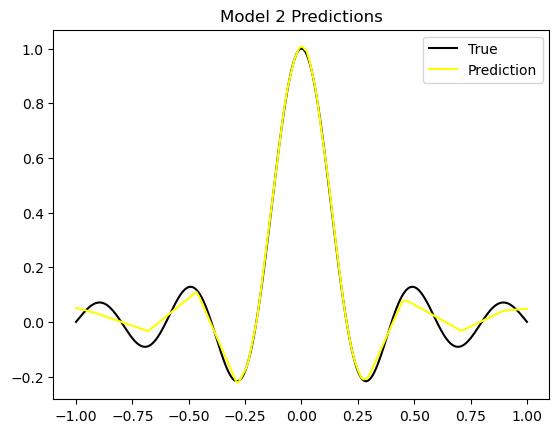


--- Model 3 ---
Total parameters: 2233

Model 3 Weights Before Training
layer1.weight: Parameter containing:
tensor([[ 0.3062],
        [-0.6937],
        [-0.4521],
        [ 0.0057],
        [ 0.5924],
        [-0.0049],
        [ 0.9458],
        [ 0.9390],
        [ 0.2528],
        [-0.6112],
        [-0.4841],
        [-0.2631],
        [ 0.0877],
        [-0.6143]], requires_grad=True)
layer1.bias: Parameter containing:
tensor([-0.9523, -0.2984, -0.7254,  0.3318, -0.5319, -0.3008,  0.4251,  0.2076,
         0.0111,  0.5690, -0.7097,  0.2614,  0.0740, -0.9559],
       requires_grad=True)
layer2.weight: Parameter containing:
tensor([[ 0.0788, -0.1793, -0.0689, -0.1257, -0.2509,  0.1728,  0.1581,  0.0314,
         -0.1737,  0.2396, -0.0954, -0.1843, -0.1959,  0.0377],
        [-0.1540, -0.0384, -0.2597, -0.0701, -0.2503, -0.1908, -0.2180, -0.1699,
          0.2158, -0.0833, -0.1794,  0.2546,  0.0231, -0.2185],
        [-0.2077,  0.0290, -0.1886,  0.1096, -0.2279, -0.2393,  0.1509,

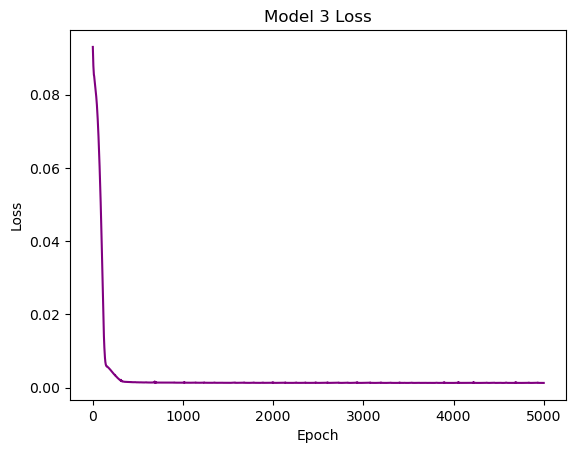

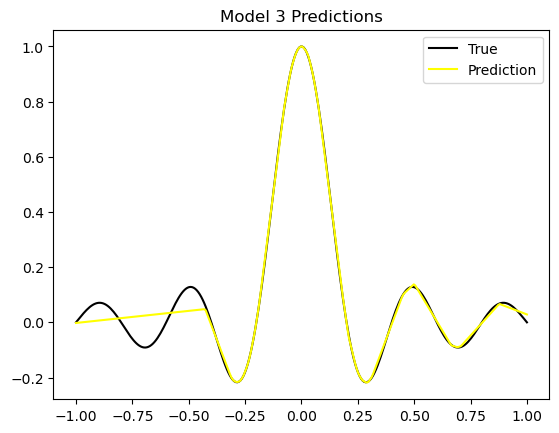


Total parameters for Model 1: 2177
Total parameters for Model 2: 2113
Total parameters for Model 3: 2233


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(1)

# Create the dataset (x, y)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5 * np.pi * x)) / (5 * np.pi * x)

# Convert to float tensors
x, y = x.float(), y.float()

# Plot the original function
plt.figure(figsize=(10, 4))
plt.plot(x.numpy(), y.numpy(), color="magenta")
plt.title('Function Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Training function
def train_model(model, x, y, optimizer, loss_func):
    model.train()
    max_epoch = 5000
    epochs, losses = [], []
    converged = False
    epoch = 0

    while not converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epochs.append(epoch)
        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}', end='\r', flush=True)

        if epoch >= max_epoch:
            print("\nReached max epochs")
            converged = True
        elif epoch > 5 and losses[-1] < 0.001:
            if abs(losses[-3] - losses[-2]) < 1e-5 and abs(losses[-2] - losses[-1]) < 1e-5:
                print(f"\nConverged: Loss {losses[-1]:.4f} at Epoch {epoch}")
                converged = True

    return epochs, losses, prediction

# Function to count model parameters
def count_params(model):
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Total parameters: {total_params}')
    return total_params

# Function to print model weights
def print_model_weights(model, is_before, model_num):
    if is_before:
        print(f"\nModel {model_num} Weights Before Training")
    else:
        print(f"\nModel {model_num} Weights After Training")

    for name, param in model.named_parameters():
        print(f'{name}: {param}')

# ------------------- Model 1 -------------------

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.layer1 = nn.Linear(1, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = self.output(x)
        return x

# Initialize Model 1
model1 = Model1()
optimizer1 = optim.Adam(model1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_function = nn.MSELoss()

# Count parameters and print weights before training
print("\n--- Model 1 ---")
params_model1 = count_params(model1)
print_model_weights(model1, is_before=True, model_num=1)

# Train Model 1
epochs1, losses1, predictions1 = train_model(model1, x, y, optimizer1, loss_function)

# Print weights after training
print_model_weights(model1, is_before=False, model_num=1)

# Plot loss over epochs for Model 1
plt.plot(epochs1, losses1, color="blue")
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot predictions for Model 1
plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x.numpy(), predictions1.detach().numpy(), color="yellow", label="Prediction")
plt.title('Model 1 Predictions')
plt.legend()
plt.show()

# ------------------- Model 2 -------------------

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(1, 18)
        self.layer2 = nn.Linear(18, 30)
        self.layer3 = nn.Linear(30, 30)
        self.layer4 = nn.Linear(30, 18)
        self.output = nn.Linear(18, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = self.output(x)
        return x

# Initialize Model 2
model2 = Model2()
optimizer2 = optim.Adam(model2.parameters(), lr=0.0012, weight_decay=1e-4)

# Count parameters and print weights before training
print("\n--- Model 2 ---")
params_model2 = count_params(model2)
print_model_weights(model2, is_before=True, model_num=2)

# Train Model 2
epochs2, losses2, predictions2 = train_model(model2, x, y, optimizer2, loss_function)

# Print weights after training
print_model_weights(model2, is_before=False, model_num=2)

# Plot loss over epochs for Model 2
plt.plot(epochs2, losses2, color="green")
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot predictions for Model 2
plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x.numpy(), predictions2.detach().numpy(), color="yellow", label="Prediction")
plt.title('Model 2 Predictions')
plt.legend()
plt.show()

# ------------------- Model 3 -------------------

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.layer1 = nn.Linear(1, 14)
        self.layer2 = nn.Linear(14, 34)
        self.layer3 = nn.Linear(34, 34)
        self.layer4 = nn.Linear(34, 14)
        self.output = nn.Linear(14, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = self.output(x)
        return x

# Initialize Model 3
model3 = Model3()
optimizer3 = optim.Adam(model3.parameters(), lr=0.0012, weight_decay=1e-4)

# Count parameters and print weights before training
print("\n--- Model 3 ---")
params_model3 = count_params(model3)
print_model_weights(model3, is_before=True, model_num=3)

# Train Model 3
epochs3, losses3, predictions3 = train_model(model3, x, y, optimizer3, loss_function)

# Print weights after training
print_model_weights(model3, is_before=False, model_num=3)

# Plot loss over epochs for Model 3
plt.plot(epochs3, losses3, color="purple")
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot predictions for Model 3
plt.plot(x.numpy(), y.numpy(), color="black", label="True")
plt.plot(x.numpy(), predictions3.detach().numpy(), color="yellow", label="Prediction")
plt.title('Model 3 Predictions')
plt.legend()
plt.show()

# ------------------- Comparison of Models -------------------

# Print total parameters for each model
print(f"\nTotal parameters for Model 1: {params_model1}")
print(f"Total parameters for Model 2: {params_model2}")
print(f"Total parameters for Model 3: {params_model3}")


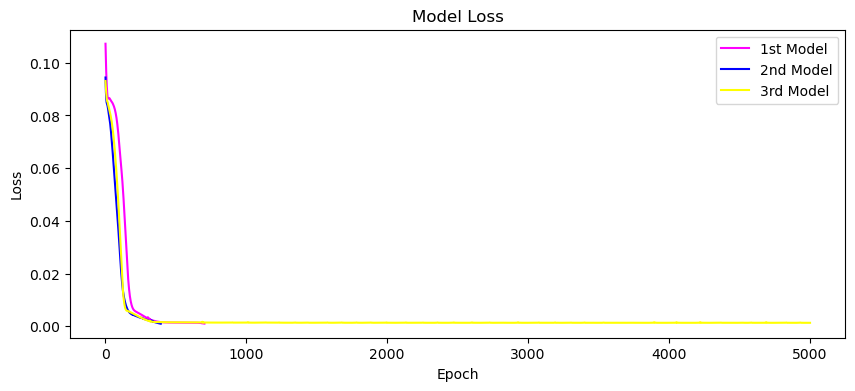

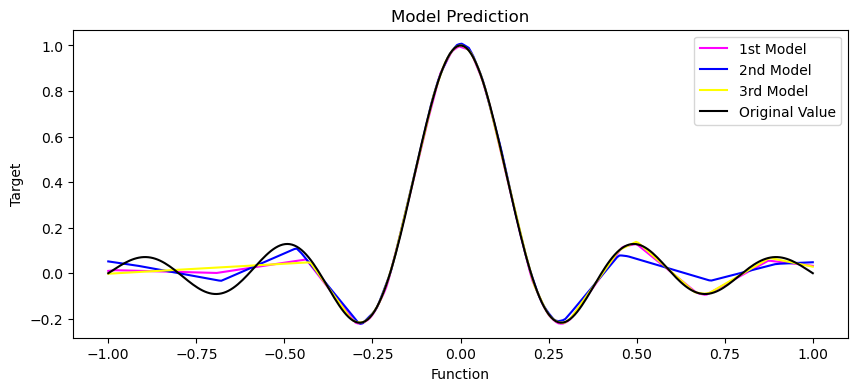

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(epochs1, losses1, color="magenta")  # Model 1 losses
plt.plot(epochs2, losses2, color="blue")     # Model 2 losses
plt.plot(epochs3, losses3, color="yellow")   # Model 3 losses
plt.title('Model Loss')
plt.legend(['1st Model', '2nd Model', '3rd Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss1.pdf')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(x, predictions1.detach().numpy(), color="magenta")  # Model 1 predictions
plt.plot(x, predictions2.detach().numpy(), color="blue")     # Model 2 predictions
plt.plot(x, predictions3.detach().numpy(), color="yellow")   # Model 3 predictions
plt.plot(x, y.numpy(), color="black")  # Original values
plt.title('Model Prediction')
plt.legend(['1st Model', '2nd Model', '3rd Model', 'Original Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.savefig('Model_Prediction1.pdf')
plt.show()


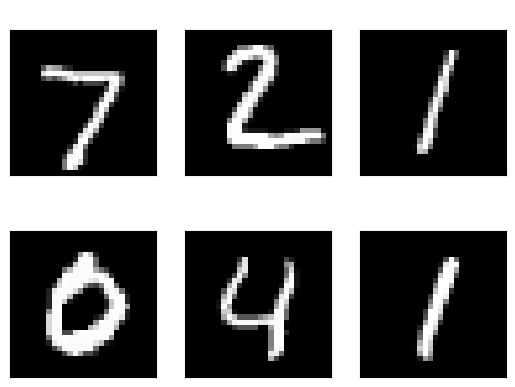

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Load and preprocess MNIST dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=False)

# Fetch a batch of test data
test_batch = iter(test_loader)
sample_images, sample_labels = next(test_batch)

# Plot the first six test images and their actual labels
for idx in range(6):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(sample_images[idx][0], cmap='gray')
    plt.title(f"Label: {sample_labels[idx]}", color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()


In [5]:
def train_model(network, num_epochs):
    network.train()  # Set model to training mode
    total_steps = len(train_loader)
    epoch_losses = []
    epoch_numbers = []
    accuracies = []
    converging = True
    current_epoch = 0
    avg_loss_per_epoch = []

    while converging:
        current_epoch += 1
        correct_predictions = 0
        total_samples = 0
        cumulative_loss = 0

        for batch_idx, (data, targets) in enumerate(train_loader):  
            # Forward pass
            outputs = network(data)
            loss = loss_function(outputs, targets)
            cumulative_loss += loss.item()

            # Backpropagation and optimizer step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predictions = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_predictions += (predictions == targets).sum().item()
            accuracy = 100.0 * correct_predictions / total_samples

            # Print progress and log metrics
            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch [{current_epoch}/{num_epochs}], Batch [{batch_idx + 1}/{total_steps}], Loss: {loss.item():.4f}', end='\r', flush=True)
                epoch_numbers.append(current_epoch)
                epoch_losses.append(loss.item())
                print(f'Epoch [{current_epoch}/{num_epochs}], Accuracy: {accuracy:.2f}%', end='\r', flush=True)
                accuracies.append(accuracy)

                if current_epoch == num_epochs:
                    print(f"Reached Max Epoch: {num_epochs}, Final Loss: {loss.item():.4f}, Final Accuracy: {accuracy:.2f}%")
                    converging = False
                elif (current_epoch > 5) and (epoch_losses[-1] < 0.001):
                    if abs(epoch_losses[-3] - epoch_losses[-2]) < 1e-5 and abs(epoch_losses[-2] - epoch_losses[-1]) < 1e-5:
                        print(f"Convergence reached with loss: {epoch_losses[-1]:.4f}")
                        converging = False

        avg_loss_per_epoch.append(cumulative_loss / (batch_idx + 1))

    return epoch_numbers, epoch_losses, accuracies, avg_loss_per_epoch



Training Model 1:
Reached Max Epoch: 15, Final Loss: 0.0873, Final Accuracy: 97.82%


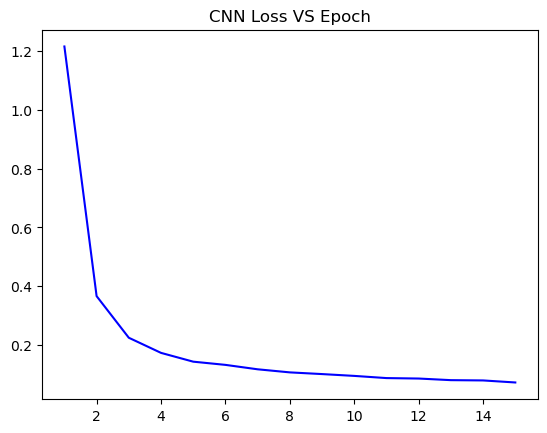

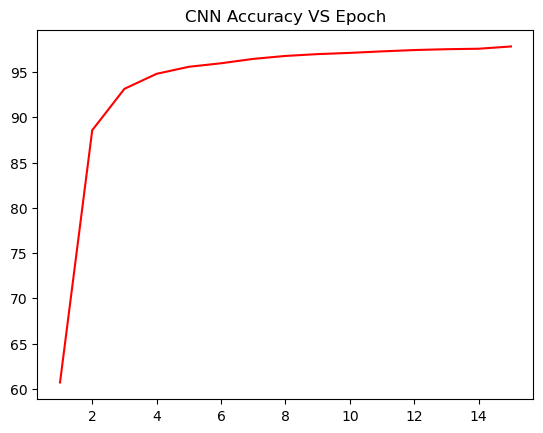

Total parameters in Model 1: 25550

Training Model 2:
Reached Max Epoch: 15, Final Loss: 0.0649, Final Accuracy: 98.50%


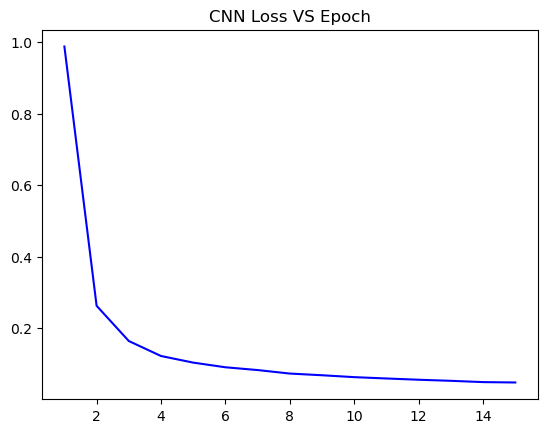

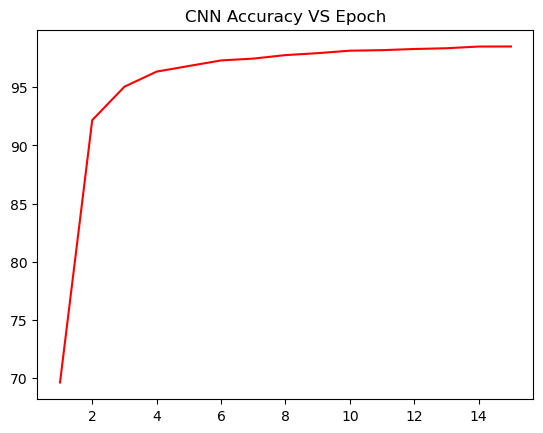

Total parameters in Model 2: 35992

Training Model 3:
Reached Max Epoch: 15, Final Loss: 0.0840, Final Accuracy: 98.14%


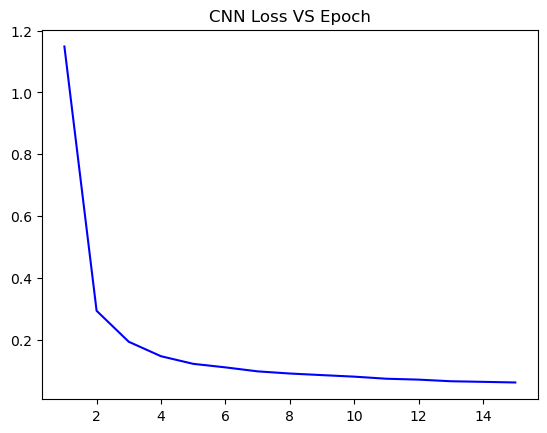

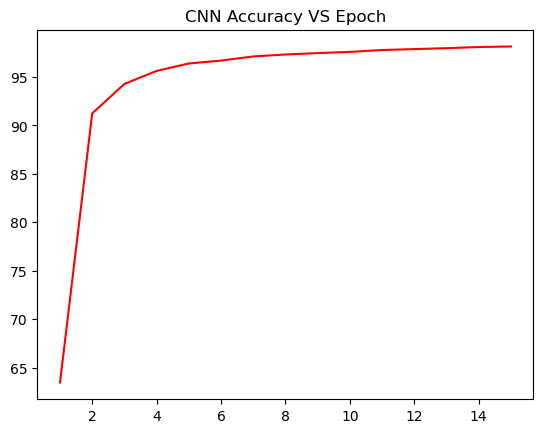

Total parameters in Model 3: 30434


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Hyper-parameters
input_size = 784  # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25

# Model 1: CNN1
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size)  # 1st Convolution
        self.pool = nn.MaxPool2d(2, 2)              # Pooling
        self.conv2 = nn.Conv2d(10, 20, kernel_size)  # 2nd Convolution
        self.fc1 = nn.Linear(320, 50)               # Fully connected layer
        self.dropout = nn.Dropout(dropout)          # Dropout
        self.fc2 = nn.Linear(50, 100)               # Fully connected layer
        self.fc3 = nn.Linear(100, 10)               # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model 2: CNN2
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size)  # 1st Convolution (changed channels)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 20, kernel_size)  # 2nd Convolution (same output channels)
        self.fc1 = nn.Linear(320, 70)               # Slightly larger hidden layer
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(70, 100)               # Adjusted fully connected layer
        self.fc3 = nn.Linear(100, 10)               # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model 3: CNN3
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size)  # Adjusted 1st Convolution
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 20, kernel_size)  # Same 2nd Convolution
        self.fc1 = nn.Linear(320, 60)               # Adjusted hidden layer size
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(60, 100)               # Same fully connected layer
        self.fc3 = nn.Linear(100, 10)               # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 320)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training and Plotting functions (Assumed to be defined as in previous code)
def train_model(network, num_epochs):
    # Define loss function and optimizer
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate, weight_decay=weight_decay_val)
    loss_function = nn.CrossEntropyLoss()

    network.train()
    total_steps = len(train_loader)
    epoch_losses = []
    epoch_numbers = []
    accuracies = []
    converging = True
    current_epoch = 0
    avg_loss_per_epoch = []

    while converging:
        current_epoch += 1
        correct_predictions = 0
        total_samples = 0
        cumulative_loss = 0

        for batch_idx, (data, targets) in enumerate(train_loader):  
            outputs = network(data)
            loss = loss_function(outputs, targets)
            cumulative_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predictions = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_predictions += (predictions == targets).sum().item()
            accuracy = 100.0 * correct_predictions / total_samples

            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch [{current_epoch}/{num_epochs}], Batch [{batch_idx + 1}/{total_steps}], Loss: {loss.item():.4f}', end='\r', flush=True)
                epoch_numbers.append(current_epoch)
                epoch_losses.append(loss.item())
                print(f'Epoch [{current_epoch}/{num_epochs}], Accuracy: {accuracy:.2f}%', end='\r', flush=True)
                accuracies.append(accuracy)

                if current_epoch == num_epochs:
                    print(f"Reached Max Epoch: {num_epochs}, Final Loss: {loss.item():.4f}, Final Accuracy: {accuracy:.2f}%")
                    converging = False
                elif (current_epoch > 5) and (epoch_losses[-1] < 0.001):
                    if abs(epoch_losses[-3] - epoch_losses[-2]) < 1e-5 and abs(epoch_losses[-2] - epoch_losses[-1]) < 1e-5:
                        print(f"Convergence reached with loss: {epoch_losses[-1]:.4f}")
                        converging = False

        avg_loss_per_epoch.append(cumulative_loss / (batch_idx + 1))

    return epoch_numbers, epoch_losses, accuracies, avg_loss_per_epoch

# Plot the training results
def plot_results(epoch_numbers, avg_loss_per_epoch, accuracies):
    plt.plot(epoch_numbers, avg_loss_per_epoch, color="blue")
    plt.title('CNN Loss VS Epoch')
    plt.show()

    plt.plot(epoch_numbers, accuracies, color="red")
    plt.title('CNN Accuracy VS Epoch')
    plt.show()

# Instantiate all models
cnn1 = CNN1()
cnn2 = CNN2()
cnn3 = CNN3()

# Train and plot for each model
for i, cnn in enumerate([cnn1, cnn2, cnn3], start=1):
    print(f"\nTraining Model {i}:")
    train_epoch, train_losses, train_acc, trainAvgLossArr = train_model(cnn, max_epochs)
    plot_results(train_epoch, trainAvgLossArr, train_acc)

    # Print total number of parameters
    params = sum(p.numel() for p in cnn.parameters())
    print(f'Total parameters in Model {i}: {params}')
